In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 

D:\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


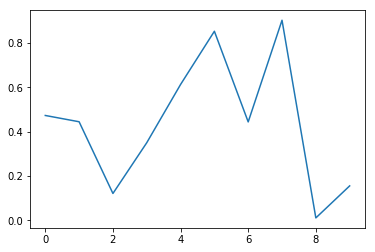

In [2]:
plt.plot(np.random.rand(10))

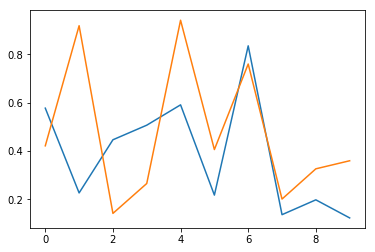

In [10]:
plt.plot(np.random.rand(10,2))

In [9]:
#size前一个数表示有几个点，后一个数表示有几条线

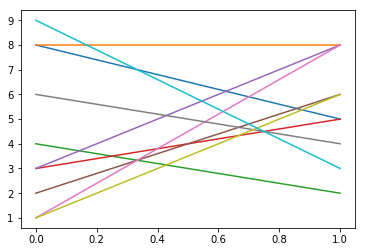

In [8]:
plt.plot(np.random.randint(1,10,size=(2,10)))

## 图标的基本元素

[Text(0, 0, '0.00'),
 Text(0, 0, '0.20'),
 Text(0, 0, '0.40'),
 Text(0, 0, '0.60'),
 Text(0, 0, '0.80'),
 Text(0, 0, '1.00'),
 Text(0, 0, '1.20')]

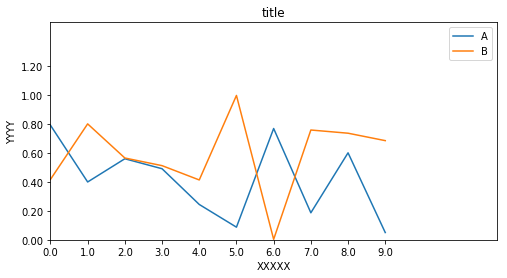

In [12]:
df = pd.DataFrame(np.random.rand(10,2),columns=['A','B'])
fig = df.plot(figsize=(8,4))#figsize创建图标窗口，设置窗口大小

plt.title('title')#图名
plt.xlabel('XXXXX')#x轴标签
plt.ylabel('YYYY')#y轴标签

plt.legend(loc='upper right')#显示图例，loc设置位置
plt.xlim([0,12])#设置x轴的边界
plt.ylim([0,1.5])#设置y轴边界

plt.xticks(range(10))#设置x轴刻度
plt.yticks([0,0.2,0.4,0.6,0.8,1.0,1.2])#设置y轴刻度

fig.set_xticklabels("%.1f"%i for i in range(10))#x轴刻度标签
fig.set_yticklabels("%.2f"%i for i in [0,0.2,0.4,0.6,0.8,1.0,1.2])#y轴刻度标签
#x轴范围为0-12，但是刻度只有0-9，刻度标签使得其显示1位小数

## 图表样式

 - linestyle
 - color
 - marker
 - style(linestyle、marker、color)
 - alpha
 - colormap
 - grid
 [color参考](https://matplotlib.org/gallery/color/named_colors.html#sphx-glr-gallery-color-named-colors-py)

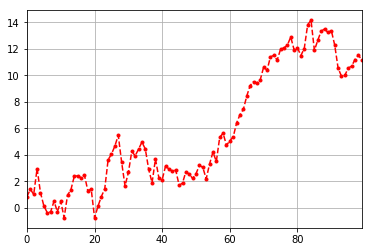

In [13]:
#独立设置
s = pd.Series(np.random.randn(100).cumsum())
s.plot(linestyle='--',
      marker='.',
      color='r',
      grid=True)

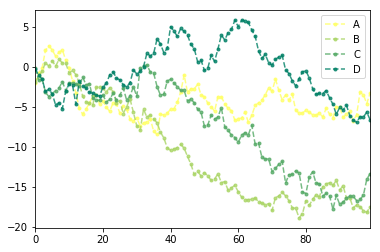

In [14]:
#直接用风格样式设置
#透明度与颜色版
# s.plot(style='--.',alpha=0.8,colormap='Reds_r')
df = pd.DataFrame(np.random.randn(100,4),columns=list('ABCD')).cumsum()
df.plot(style='--.',alpha=0.8,colormap='summer_r')

## 图表注解

Text(5, 0.5, 'here')

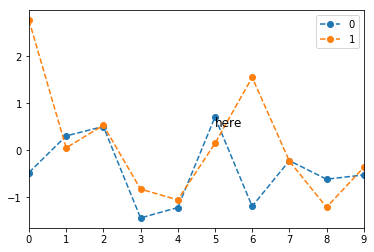

In [16]:
df = pd.DataFrame(np.random.randn(10,2))
df.plot(style='--o')
plt.text(5,0.5,'here',fontsize=12)

## 子图绘制
matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, 
                         FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)

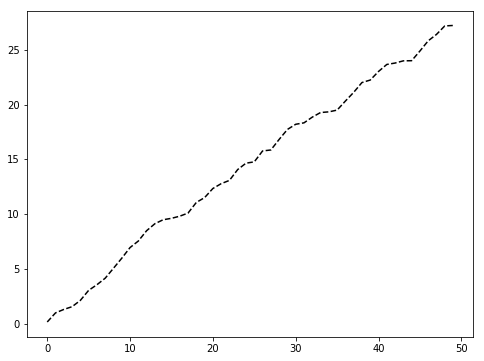

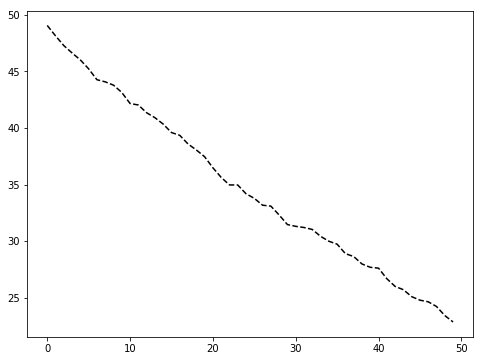

In [18]:
fig1 = plt.figure(num=1,figsize=(8,6))
plt.plot(np.random.rand(50).cumsum(),'k--')
fig2 =plt.figure(num=2,figsize=(8,6))
plt.plot(50-np.random.rand(50).cumsum(),'k--')

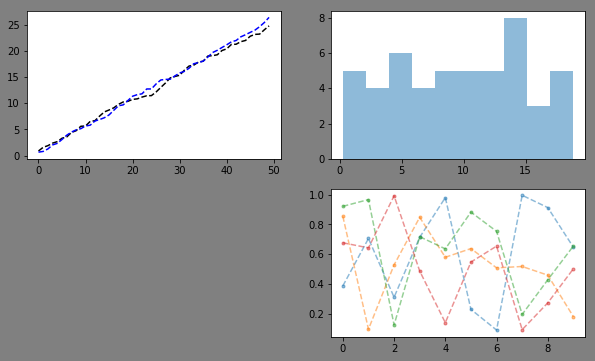

In [22]:
fig = plt.figure(figsize=(10,6),facecolor='gray')

ax1 = fig.add_subplot(2,2,1)
plt.plot(np.random.rand(50).cumsum(),'k--')
plt.plot(np.random.rand(50).cumsum(),'b--')

ax2 = fig.add_subplot(2,2,2)
ax2.hist(np.random.rand(50).cumsum(),alpha=0.5)

ax4 = fig.add_subplot(2,2,4)
df2 = pd.DataFrame(np.random.rand(10,4),columns=list('ABCD'))
ax4.plot(df2,alpha=0.5,linestyle='--',marker='.')

[[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026D758D0C18>
  <matplotlib.axes._subplots.AxesSubplot object at 0x0000026D75CF7048>]] (2, 3) <class 'numpy.ndarray'>


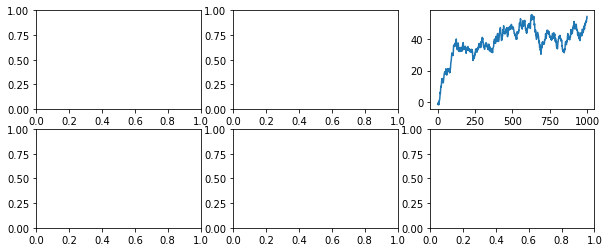

In [26]:
fig,axes = plt.subplots(2,3,figsize=(10,4))
ts = pd.Series(np.random.randn(1000).cumsum())
print(axes,axes.shape,type(axes))

#生成图表对象的数组
ax1 = axes[0,2]#选定绘图位置
ax1.plot(ts)

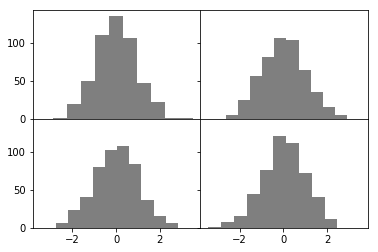

In [29]:
#plt.subplots 参数调整
#sharex，sharey设置是否贡献x，y轴刻度
fig,axes = plt.subplots(2,2,sharex=True,sharey=True)

for i in range(2):
    for j in range(2):
        axes[i,j].hist(np.random.randn(500),color='k',alpha=0.5)
        
# wspace,hspace 用于空值宽度和高度的百分比
plt.subplots_adjust(wspace=0,hspace=0)

plot()：
 - subplots:是否分别绘制子图
 - layout：绘制子图矩阵，按顺序填充

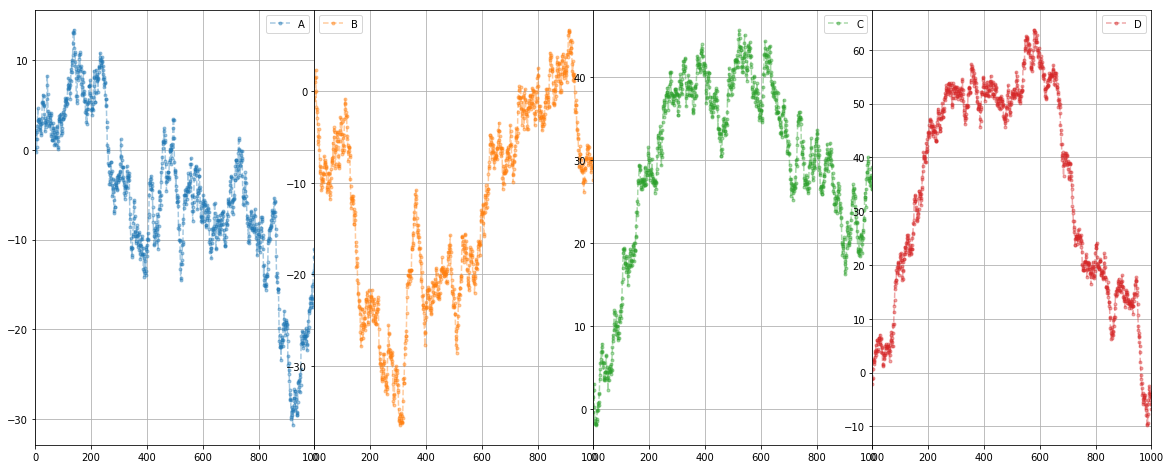

In [31]:
df = pd.DataFrame(np.random.randn(1000,4),index=ts.index,columns=list('ABCD'))
df = df.cumsum()
df.plot(style='--.',alpha=0.4,grid=True,figsize=(20,8),
       subplots=True,
       layout=(1,4),
       sharex=False)
plt.subplots_adjust(wspace=0,hspace=0.2)

## 基本图表绘制

**Series和DataFrame绘图 ** 

```
plt.plot(kind='line', ax=None, figsize=None, use_index=True, title=None, grid=None, legend=False, 
style=None, logx=False, logy=False, loglog=False, xticks=None, yticks=None, xlim=None, ylim=None, 
rot=None, fontsize=None, colormap=None, table=False, yerr=None, xerr=None, label=None, secondary_y=False, **kwds)
```

参数含义：
 - series的index为横坐标
 - value为纵坐标
 - kind->line、bar、barh（折线图、柱状图、柱状图-横）
 - label ->图例风格，Dataframe格式以列名为label
 - style ->风格字符串，包括linestyle，marker，color
 - color ->颜色，有color指定时，以指定颜色为准
 - alpha ->透明度，0-1
 - use_index ->将索引用为刻度标签，默认为True
 - rot ->旋转刻度标签，0-360
 - grid ->显示网格，一般直接用plt.grid
 - xlim、ylim ->x,y轴界限
 - xticks,yticks ->x,y轴刻度值
 - figsize ->图像大小
 - title ->图名
 - legend -> 是否显示图例，一般用plt.legend()

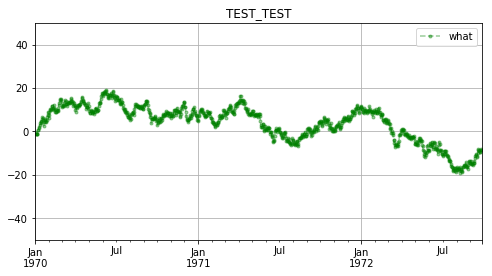

In [43]:
ts = pd.Series(np.random.randn(1000),index=pd.date_range(1/1/2019,periods=1000))#pandas时间序列
ts = ts.cumsum()
ts.plot(kind='line',
       label='what',
       style='--.',
       alpha=0.4,
       color='g',
       use_index=True,
#        rot = 45,
       grid = True,
       ylim = [-50,50],
#        yticks=list(range(-50,50)),
       figsize = (8,4),
       title = 'TEST_TEST',
       legend=True)
#对网格进行更加细致的设置
#plt.grid(True,linestyle='--',color='gray',linewidth='0.5',axis='x')
# plt.legend()

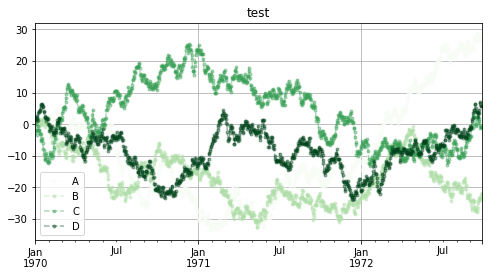

In [44]:
df = pd.DataFrame(np.random.randn(1000,4),index=ts.index,columns=list('ABCD')).cumsum()
df.plot(kind='line',
        style='--.',
       alpha=0.4,
       use_index=True,
       grid=True,
       figsize=(8,4),
       title='test',
       legend=True,
       subplots=False,
       colormap='Greens')


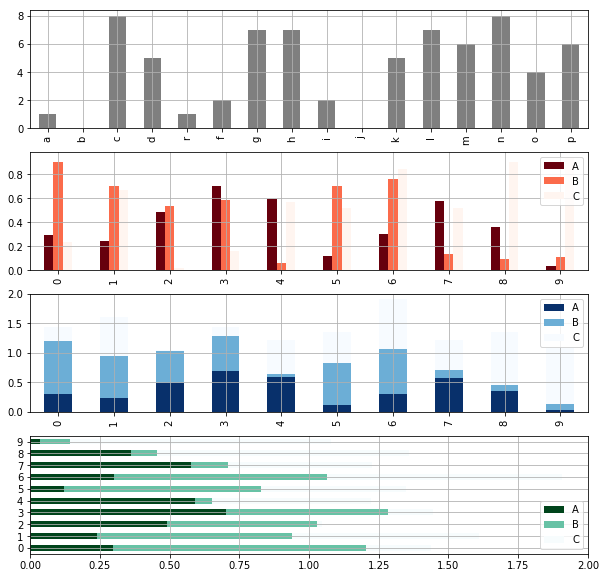

In [47]:
#创建一个新的figure，并返回一个subplot对象的numpy数组
fig,axes = plt.subplots(4,1,figsize=(10,10))

s = pd.Series(np.random.randint(0,10,16),index=list('abcdrfghijklmnop'))
df = pd.DataFrame(np.random.rand(10,3),columns=list('ABC'))

#单系列柱状图方法1：plt.plot(kind='bar/barh)
s.plot(kind='bar',color='k',grid=True,alpha=0.5,ax=axes[0])#ax参数用来选取子图位置

#多系列柱状图
df = pd.DataFrame(np.random.rand(10,3),columns=list('ABC'))
df.plot(kind='bar',ax=axes[1],grid=True,colormap='Reds_r')

#多系列堆叠
#stacked -->堆叠
df.plot(kind='bar',ax=axes[2],grid=True,colormap='Blues_r',stacked=True)

df.plot.barh(ax=axes[3],grid=True,colormap='BuGn_r',stacked=True)

plt.bar()
 - x,y参数：x,y的值
 - width：宽度比例
 - facecolor柱状图里填充的颜色，edgecolor是边框颜色
 - left每个柱x轴左边界，bottom-每个柱y轴下边界，bottom扩展可化为甘特图Gantt Chart
 - align 决定整个bar图的分布，默认为从左边界开始绘制，center将从中间开始绘制、
 - xerr/yerr：x/y方向error bar

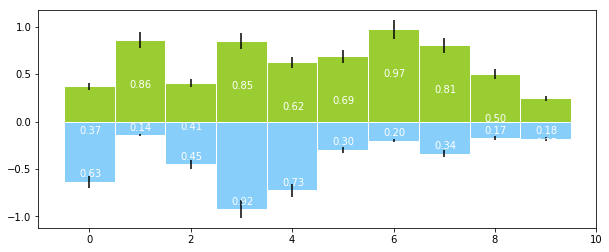

In [49]:
plt.figure(figsize=(10,4))

x =np.arange(10)
y1=np.random.rand(10)
y2=-np.random.rand(10)
plt.bar(x,y1,width=1,facecolor='yellowgreen',edgecolor='white',yerr=y1*0.1)
plt.bar(x,y2,width=1,facecolor='lightskyblue',edgecolor='white',yerr=y2*0.1)

for i,j in zip(x,y1):
    plt.text(i-0.2,j-0.5,'%.2f'%j,color='white')
for i,j in zip(x,y2):
    plt.text(i-0.2,j+0.05,'%.2f'%-j,color='white')
    

面积图
 - stacked:是否堆叠，默认情况下，区域图被堆叠
 - 为了产生堆叠面积图，每列必须是正直或者全部为负值
 - 当数据为NaN时，自动用0填充，图标签需要清洗缺失值

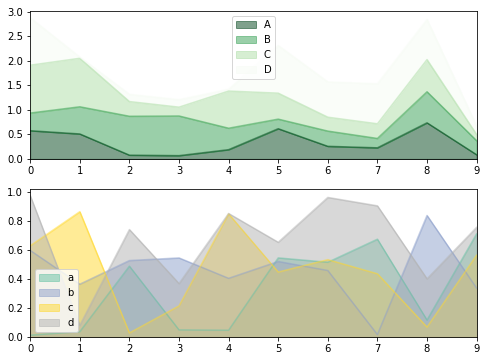

In [53]:
fig,axes = plt.subplots(2,1,figsize=(8,6))

df1 = pd.DataFrame(np.random.rand(10,4),columns=list('ABCD'))
df2 = pd.DataFrame(np.random.rand(10,4),columns=list('abcd'))

df1.plot.area(stacked=True,colormap='Greens_r',alpha=0.5,ax=axes[0])
df2.plot.area(stacked=False,colormap='Set2',alpha=0.5,ax=axes[1])

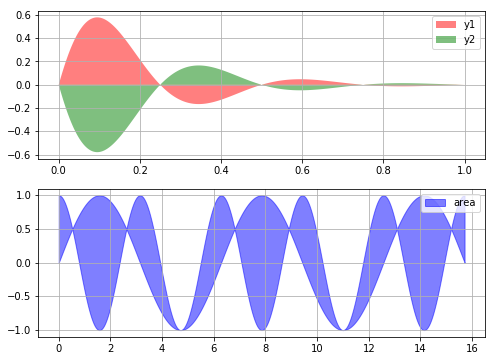

In [60]:
fig,axes = plt.subplots(2,1,figsize=(8,6))
x = np.linspace(0,1,500)
y1 = np.sin(4 * np.pi * x)* np.exp(-5 * x)
y2 = -np.sin(4 * np.pi * x)* np.exp(-5 * x)
axes[0].fill(x,y1,'r',alpha=0.5,label='y1')
axes[0].fill(x,y2,'g',alpha=0.5,label='y2')

x = np.linspace(0,5*np.pi,1000)
y1 = np.sin(x)
y2 = np.cos(2*x)
#填充两个函数之间的区域，用fill_between函数
axes[1].fill_between(x,y1,y2,color='b',alpha=0.5,label='area')

for i in range(2):
    axes[i].legend()
    axes[i].grid()

饼状图
```
matplotlib.pyplot.pie(x, explode=None, labels=None, colors=None, 
                      autopct=None, pctdistance=0.6, shadow=False, 
                      labeldistance=1.1, startangle=None, radius=None, 
                      counterclock=True, wedgeprops=None, textprops=None, 
                      center=(0, 0), frame=False, rotatelabels=False, *, 
                      data=None)[source]
```
 - x :数据
 - explode: 制定每部分的偏移量
 - labels：标签
 - color:颜色
 - autopct：饼图上的数据标签显示方式
 - pctdistance：每个饼切片的中心和通过autopac生成的文本之间的比例
 - labeldistance：被画饼标记的直径，默认值为1.1
 - shadow：阴影
 - startangle：开始角度
 - radius：半径
 - frame：图框
 - counterclock：指定指针方向，顺时针或者逆时针

([<matplotlib.patches.Wedge at 0x26d79fdeb38>,
 [Text(1.7967832755462236, 0.6177134130949259, 'r'),
  Text(-0.6074825183216732, 1.6943922184469444, 'g'),
  Text(-0.7851948957682644, -1.619712621318814, 'b'),
  Text(1.6092726169858314, -0.8063756222875125, 'c')],
 [Text(0.945675408182223, 0.32511232268153994, '10.54%'),
  Text(-0.3037412591608366, 0.8471961092234722, '39.88%'),
  Text(-0.3925974478841322, -0.809856310659407, '34.80%'),
  Text(0.8046363084929157, -0.40318781114375624, '14.79%')])

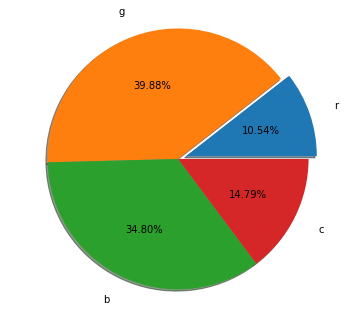

In [61]:
s = pd.Series(3 * np.random.rand(4),index=list('ABCD'),name='series')
plt.axis('equal')#保证长宽相等
plt.pie(s,
       explode=[0.1,0,0,0],
       labels = ['r','g','b','c'],
       autopct='%.2f%%',
       pctdistance=0.6,
       labeldistance=1.2,
       shadow=True,
       startangle=0,
        radius=1.5,
        frame=False
       )

直方图
```
matplotlib.pyplot.hist(x, bins=None, range=None, density=None, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, normed=None, *, data=None, **kwargs)[source]
```
 - bin：箱子的宽度
 - density：标准化
 - histtype风格：水平还是竖直horizontal，vectical
 - align：{'left','mid','right'},optional(对齐方式)
 - stacked：是否堆叠
```

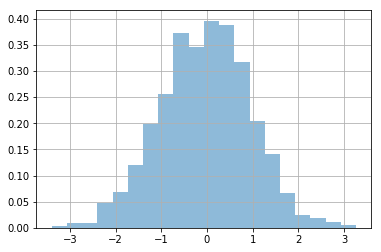

In [66]:
s = pd.Series(np.random.randn(1000))
s.hist(bins=20,
      histtype='bar',
      align='mid',
      orientation='vertical',
      alpha=0.5,
      density=True)

# s.plot(kind='kde',style='k--')

散点图
```
matplotlib.pyplot.scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, edgecolors=None, *, data=None, **kwargs)
```
 - s：散点大小
 - c:散点颜色
 - vmin，vmax：亮度设置，标量
 - cmap:colormap

D:\Anaconda3\lib\site-packages\matplotlib\collections.py:874: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


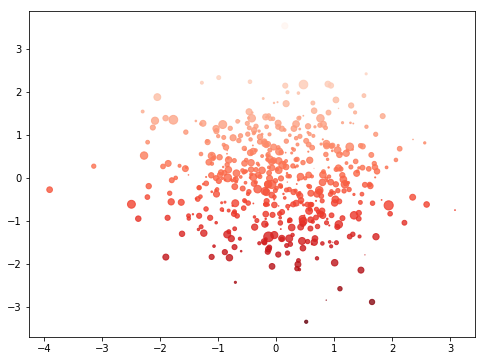

In [68]:
plt.figure(figsize=(8,6))
x = np.random.randn(1000)
y = np.random.randn(1000)

plt.scatter(x,y,marker='.',
           s = np.random.randn(1000)*100,
           cmap='Reds_r',
           c = y,
           alpha = 0.8)
plt.grid()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026D7C8B15C0>,
      dtype=object)

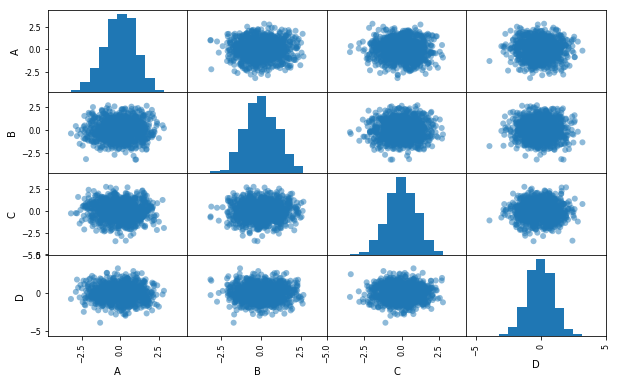

In [77]:
# pd.plotting.scatter_matrix()散点矩阵
# pd.plotting.scatter_matrix(frame, alpha=0.5, figsize=None, ax=None, 
# grid=False, diagonal='hist', marker='.', density_kwds=None, hist_kwds=None, range_padding=0.05, **kwds)
# diagonal：({‘hist’, ‘kde’})，必须且只能在{‘hist’, ‘kde’}中选择1个 → 每个指标的频率图
# range_padding：(float, 可选)，图像在x轴、y轴原点附近的留白(padding)，该值越大，留白距离越大，图像远离坐标原点
df = pd.DataFrame(np.random.randn(1000,4),columns=list('ABCD'))
pd.plotting.scatter_matrix(df,figsize=(10,6),
                 marker='o',
#                  diagonal='kde',
                 alpha=0.5,
                 range_padding=0.5
                )
                          

箱型图
```
箱型图：又称为盒须图、盒式图、盒状图或箱线图，是一种用作显示一组数据分散情况资料的统计图
包含一组数据的：最大值、最小值、中位数、上四分位数（Q1）、下四分位数（Q3）、异常值
① 中位数 → 一组数据平均分成两份，中间的数
② 下四分位数Q1 → 是将序列平均分成四份，计算(n+1)/4与(n-1)/4两种，一般使用(n+1)/4
③ 上四分位数Q3 → 是将序列平均分成四份，计算(1+n)/4*3=6.75
④ 内限 → T形的盒须就是内限，最大值区间Q3+1.5IQR,最小值区间Q1-1.5IQR （IQR=Q3-Q1）
⑤ 外限 → T形的盒须就是内限，最大值区间Q3+3IQR,最小值区间Q1-3IQR （IQR=Q3-Q1）
⑥ 异常值 → 内限之外 - 中度异常，外限之外 - 极度异常
plt.plot.box(),plt.boxplot()
```

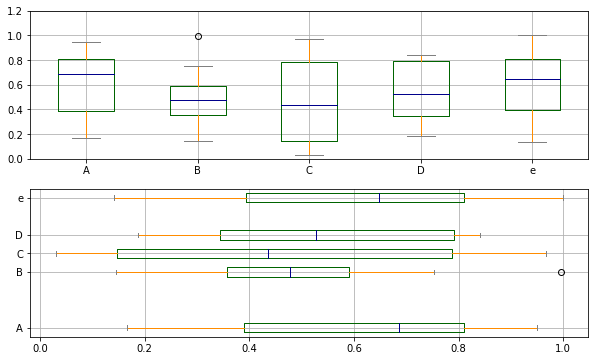

In [82]:
fig,axes = plt.subplots(2,1,figsize=(10,6))
df = pd.DataFrame(np.random.rand(10,5),columns=list('ABCDe'))

# 箱型图着色
# boxes → 箱线
# whiskers → 分位数与error bar横线之间竖线的颜色
# medians → 中位数线颜色
# caps → error bar横线颜色

color = dict(boxes='DarkGreen',whiskers='DarkOrange',medians='DarkBlue',caps='Gray')
df.plot.box(ylim=[0,1.2],
           grid=True,
           color = color,
           ax=axes[0])
df.plot.box(vert=False,
           positions=[1,4,5,6,8],
           ax=axes[1],
           grid=True,
           color = color)


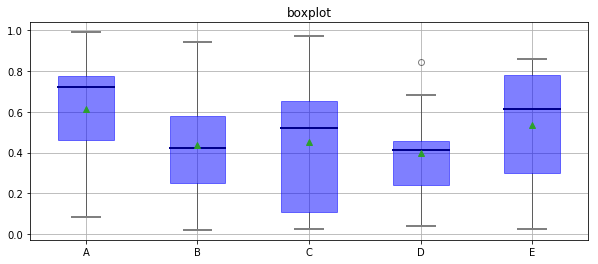

In [83]:
df = pd.DataFrame(np.random.rand(10, 5), columns=['A', 'B', 'C', 'D', 'E'])

plt.figure(figsize=(10,4))
# 创建图表、数据

f = df.boxplot(sym = 'o',  # 异常点形状，参考marker
               vert = True,  # 是否垂直
               whis = 1.5,  # IQR，默认1.5，也可以设置区间比如[5,95]，代表强制上下边缘为数据95%和5%位置
               patch_artist = True,  # 上下四分位框内是否填充，True为填充
               meanline = False,showmeans=True,  # 是否有均值线及其形状
               showbox = True,  # 是否显示箱线
               showcaps = True,  # 是否显示边缘线
               showfliers = True,  # 是否显示异常值
               notch = False,  # 中间箱体是否缺口
               return_type='dict'  # 返回类型为字典
              ) 
plt.title('boxplot')

for box in f['boxes']:
    box.set( color='b', linewidth=1)        # 箱体边框颜色
    box.set( facecolor = 'b' ,alpha=0.5)    # 箱体内部填充颜色
for whisker in f['whiskers']:
    whisker.set(color='k', linewidth=0.5,linestyle='-')
for cap in f['caps']:
    cap.set(color='gray', linewidth=2)
for median in f['medians']:
    median.set(color='DarkBlue', linewidth=2)
for flier in f['fliers']:
    flier.set(marker='o', color='y', alpha=0.5)
# boxes, 箱线
# medians, 中位值的横线,
# whiskers, 从box到error bar之间的竖线.
# fliers, 异常值
# caps, error bar横线
# means, 均值的横线,

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000026D7CDA9160>,
      dtype=object)

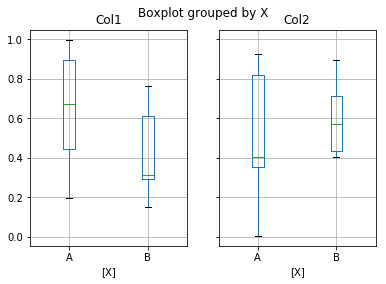

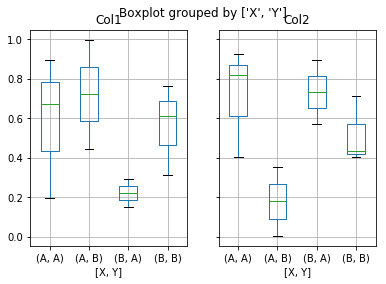

In [84]:
# plt.boxplot()绘制
# 分组汇总

df = pd.DataFrame(np.random.rand(10,2), columns=['Col1', 'Col2'] )
df['X'] = pd.Series(['A','A','A','A','A','B','B','B','B','B'])
df['Y'] = pd.Series(['A','B','A','B','A','B','A','B','A','B'])

df.boxplot(by = 'X')
df.boxplot(column=['Col1','Col2'], by=['X','Y'])
# columns：按照数据的列分子图
# by：按照列分组做箱型图